# Mushroom_Project

In [1]:
#importing required liberary

#data lib
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models

from sklearn.linear_model import LogisticRegression

#metrics

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#save
import pickle


In [2]:
#Data loading

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Observations:

1-All dataset is categorical so need to encode all features.
2-No NAN value in dataset.
3-No duplicacy in data set.
4-No imbalance in class.
5-Same value in column 'veil-type' so it has no weightage, its removed.
6-As we have applied encoding data on categorigal data so need to standardization
7-Since its classification problem so using Logistic Regression.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA

In [4]:
data.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


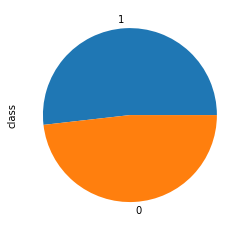

In [5]:
#Testing data imbalance-

data['class']=data['class'].replace('e',1).replace('p',0)

data['class'].value_counts().plot(kind='pie')
plt.show()


In [6]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
data.drop(columns=['veil-type'],inplace =True)

In [8]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,1,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,1,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,0,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


## Encoding

In [9]:
X=data.drop(columns=['class'])
y=data['class']

In [10]:
X_enc = pd.concat([pd.get_dummies(X[i], drop_first = True) for i in X], axis=1,keys=X.columns)

In [11]:
X_enc.head()

cap-shape             cap-surface       cap-color     ... population        \
          c  f  k  s  x           g  s  y         c  e  ...          n  s  v   
0         0  0  0  0  1           0  1  0         0  0  ...          0  1  0   
1         0  0  0  0  1           0  1  0         0  0  ...          1  0  0   
2         0  0  0  0  0           0  1  0         0  0  ...          1  0  0   
3         0  0  0  0  1           0  0  1         0  0  ...          0  1  0   
4         0  0  0  0  1           0  1  0         0  0  ...          0  0  0   

     habitat                 
   y       g  l  m  p  u  w  
0  0       0  0  0  0  1  0  
1  0       1  0  0  0  0  0  
2  0       0  0  1  0  0  0  
3  0       0  0  0  0  1  0  
4  0       1  0  0  0  0  0  

[5 rows x 95 columns]

## Model Building

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X_enc,y,test_size=0.25,random_state=313)

In [13]:
log=LogisticRegression()

In [14]:
log.fit(X_train,Y_train)

LogisticRegression()

## Model Evaluation

In [15]:
log.score(X_train,Y_train)

0.9998358772361726

In [16]:
y_pred=log.predict(X_test)

In [17]:
accuracy_score(y_pred,Y_test)

0.999507631708518

In [18]:
confusion_matrix(y_pred,Y_test)

array([[ 990,    0],
       [   1, 1040]], dtype=int64)

In [ ]:
#Predicting test result almost 100% correctly

In [19]:
filename="mushroom.pickle"
pickle.dump(log,open(filename,'wb'))

## Completed